<a href="https://colab.research.google.com/github/FaisAkbar/PCVK_Ganjil_2023/blob/main/Pertemuan11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MODULE 11 – MetodeDeteksiObjek
### Nama : Fawaa'el Akbar Firdaus
### No : 10
### NIM : 2141720215
### Kelas : TI-3B
### GitHub : https://github.com/FaisAkbar/PCVK_Ganjil_2023

# Latihan Praktikum

### No 1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### No 2

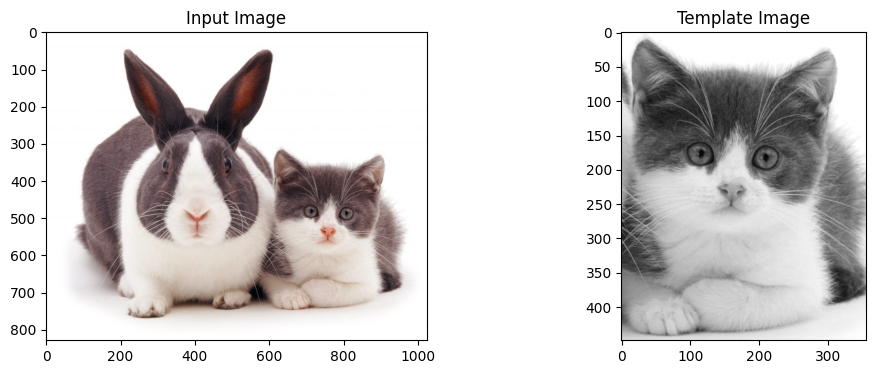

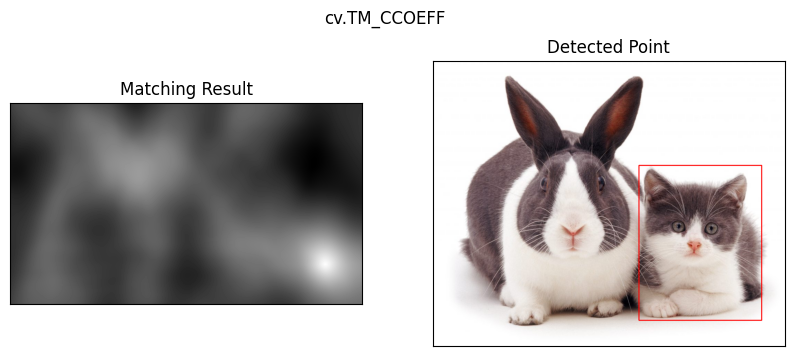

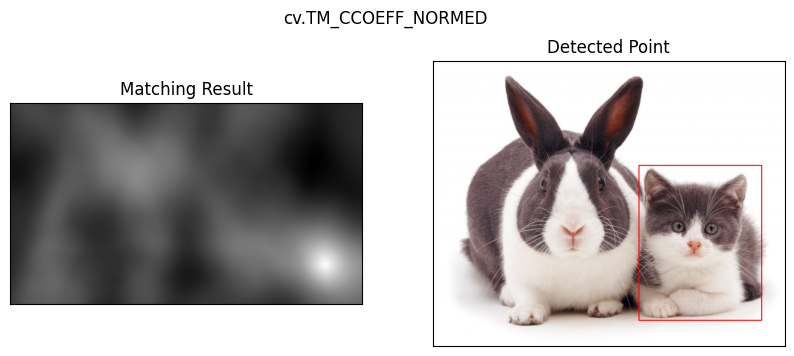

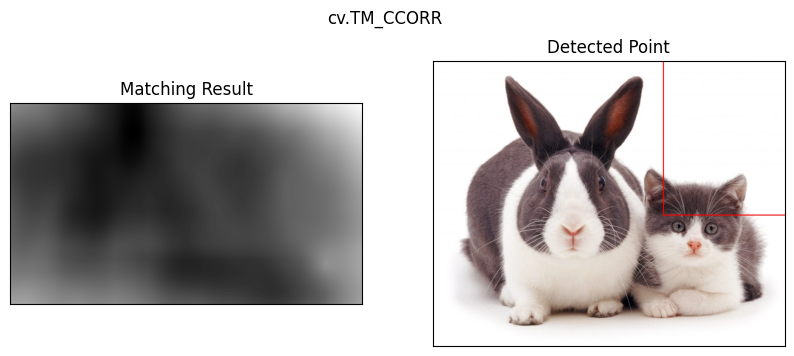

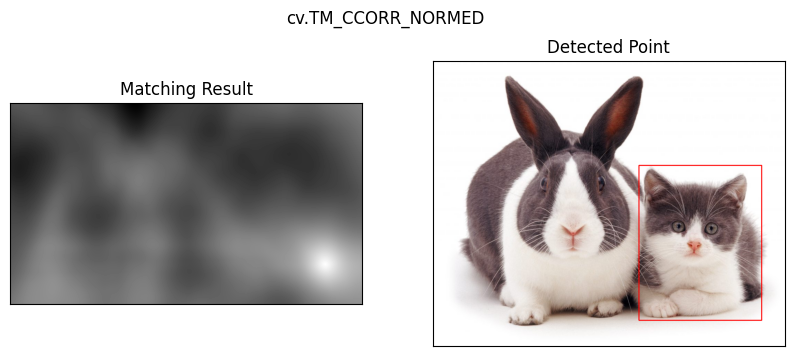

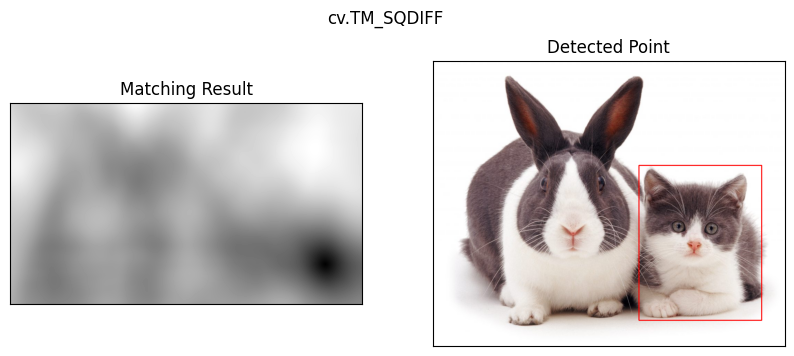

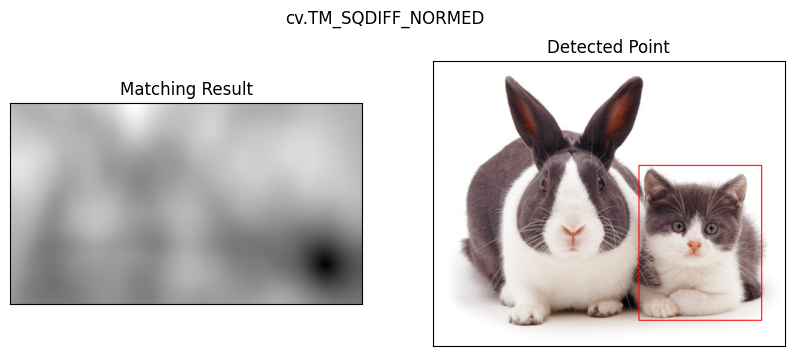

In [3]:
# Load the image and the template in color
image = cv.imread('/content/drive/MyDrive/PCVK/P11/Salinan cats_and_bunnies.jpg')
template = cv.imread('/content/drive/MyDrive/PCVK/P11/Salinan cat2_templatejpg.jpg')

# Convert the image and template to grayscale for template matching
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
template_gray = cv.cvtColor(template, cv.COLOR_BGR2GRAY)

# Store width and height of template in w and h
w, h = template_gray.shape[::-1]

# List to store all the methods available in cv for template matching
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR', 'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Input Image')

plt.subplot(122)
plt.imshow(template_gray,cmap="gray")
plt.title('Template Image')


for meth in methods:
    img = image.copy()
    method = eval(meth)

    # Apply template matching
    res = cv.matchTemplate(image_gray, template_gray, method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img, top_left, bottom_right, (0, 0, 255), 2)

    plt.figure(figsize=(10,4))
    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

### No 3

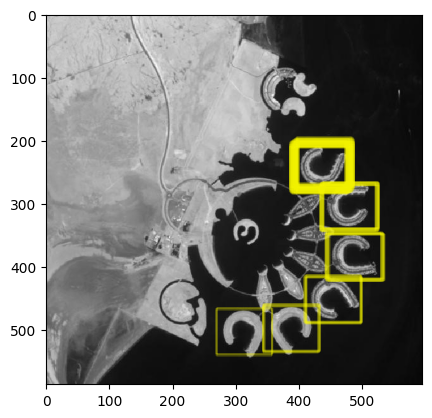

In [4]:
# Load the input image and the template
input_image = cv.imread('/content/drive/MyDrive/PCVK/P11/Salinan bahrain.jpg',0)
template = cv.imread('/content/drive/MyDrive/PCVK/P11/Salinan bahrain-template.jpg',0)

# library untuk mencocokkan beberapa gambar yang sama
from skimage.feature import match_template

# Hitung kemiripan citra dengan citra template
result = match_template(input_image, template)

# Tentukan threshold untuk menentukan hasil match
threshold = 0.45 # menentukan threshold untuk menentukan hasil matc
locations = np.where(result >= threshold)

# Plot hasil match
fig, ax = plt.subplots()
ax.imshow(input_image, cmap=plt.cm.gray)
# ax.set_axis_off()
height, width = template.shape
for loc in zip(*locations[::-1]): # iterasi pada setiap lokasi yang ditemukan
    rect = plt.Rectangle(loc, width, height, edgecolor='yellow', facecolor='none', linewidth=0.1)
    ax.add_patch(rect)

plt.show()

### No 4

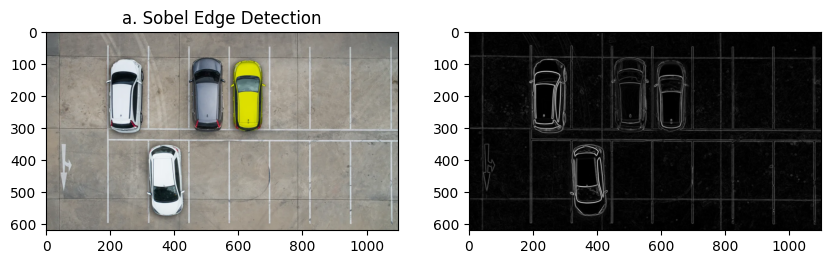

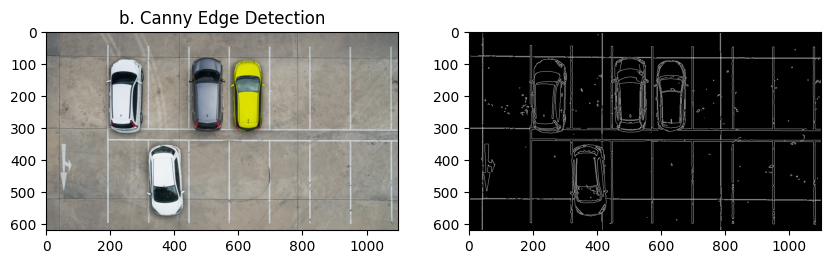

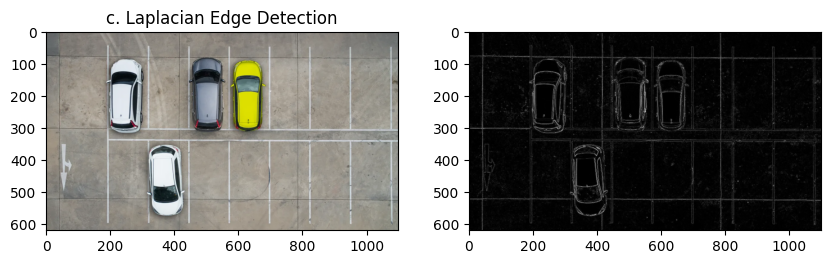

In [5]:
# Load the image
img = cv.imread('/content/drive/MyDrive/PCVK/P11/Salinan car-park.jpg')

# Convert the image to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply Sobel edge detection
sobelx = cv.Sobel(gray, cv.CV_64F, 1, 0, ksize=5)
sobely = cv.Sobel(gray, cv.CV_64F, 0, 1, ksize=5)
sobel_magnitude = cv.magnitude(sobelx, sobely)

# Apply Canny edge detection
edges = cv.Canny(gray, 100, 200)

# Apply Gaussian blur to reduce noise
# blur = cv.GaussianBlur(gray, (3,3), 0)

# Apply Laplacian edge detection
laplacian = cv.Laplacian(gray, cv.CV_64F)
laplacianFix = cv.convertScaleAbs(laplacian)

# Plot the results
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB), cmap='gray')
plt.title('a. Sobel Edge Detection')
plt.subplot(122)
plt.imshow(sobel_magnitude, cmap='gray')
plt.title('')
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB), cmap='gray')
plt.title('b. Canny Edge Detection')
plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title('')
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB), cmap='gray')
plt.title('c. Laplacian Edge Detection')
plt.subplot(122)
plt.imshow(laplacianFix, cmap='gray')
plt.title('')
plt.show()

### No 5

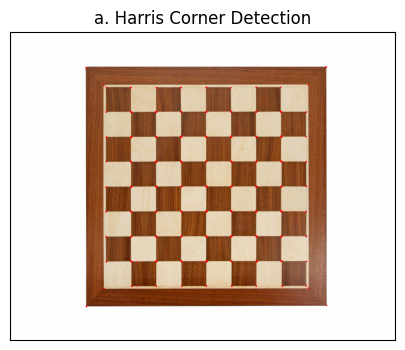

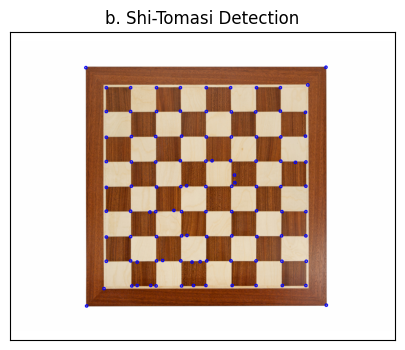

In [6]:
# Load the image
image = cv.imread('/content/drive/MyDrive/PCVK/P11/Salinan chess-board.jpg')
# Convert the image to grayscale
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Harris Corner Detection
harris_corners = cv.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
harris_corners = cv.dilate(harris_corners, None)
image_harris = image.copy()
image_harris[harris_corners > 0.01 * harris_corners.max()] = [0, 0, 255]

# Shi-Tomasi Corner Detection
corners = cv.goodFeaturesToTrack(gray, 100, 0.01, 10)
image_shi_tomasi = image.copy()
corners = np.int0(corners)
for i in corners:
    x, y = i.ravel()
    cv.circle(image_shi_tomasi, (int(x), int(y)), 3, 255, 2)

# Display the images
plt.figure(figsize=(10,4))
plt.imshow(cv.cvtColor(image_harris, cv.COLOR_BGR2RGB))
plt.title('a. Harris Corner Detection'), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(10,4))
plt.imshow(cv.cvtColor(image_shi_tomasi, cv.COLOR_BGR2RGB))
plt.title('b. Shi-Tomasi Detection'), plt.xticks([]), plt.yticks([])
plt.show()

### No 6

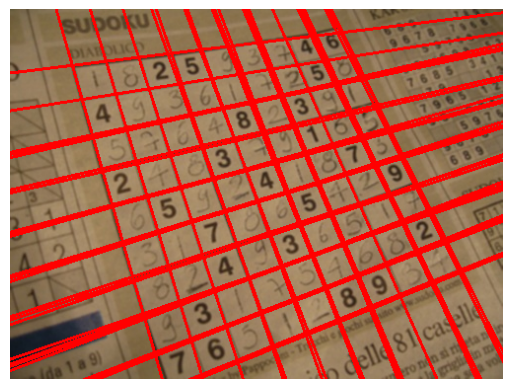

In [7]:
# Load the image
img = cv.imread('/content/drive/MyDrive/PCVK/P11/Salinan sudoku.jpg')
# Convert the image to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply edge detection method
edges = cv.Canny(gray, 60, 220, apertureSize=3)

# Apply Hough Transform
lines = cv.HoughLines(edges, 1, np.pi/180, 150)

# Iterate over the output lines and draw them
for rho, theta in lines[:,0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display the image
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### No 7

Text(0.5, 1.0, 'Contour Detectection')

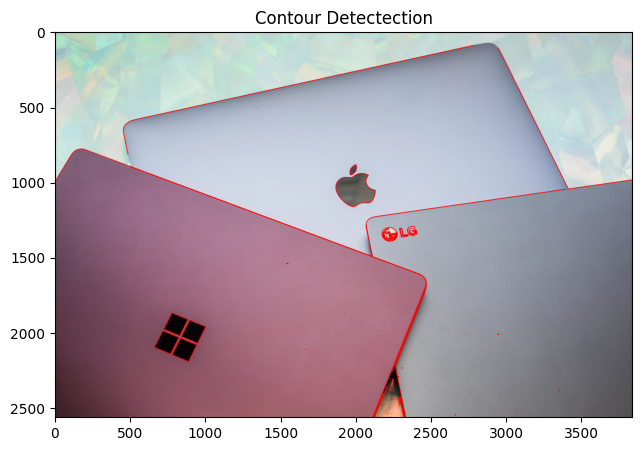

In [8]:
# Load the input image
img = cv.imread('/content/drive/MyDrive/PCVK/P11/Salinan laptop.jpg')

# Convert the image to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply edge detection
edges = cv.Canny(gray, 50, 200, apertureSize=3)

# Find contours
contours, hierarchy = cv.findContours(edges, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# Draw contours
cv.drawContours(img, contours, -1, (0, 0, 255), 3)

# Display the input image with the detected contours
plt.figure(figsize=(10,5))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Contour Detectection')

# Pengayaan Materi KTP

### 1. Import Library

### 2. Tambahkan kode lokalisasi dataset dan lakukan pembacaan file name di dalam direktori

### 3. Masih pada looping file direktori, terapkan Gaussian Blur untuk setiap file supaya noise pickle dapat direduksi

### 4. Lakukan konversi grayscale untuk setiap hasil citra yang tereduksi noise dan lanjutkan dengan binerisasi citra

### 5. Terapkan morfologi untuk setiap citra yang telah mengalami binerisasi supaya setiap karakter atau obyek tidak berhimpitan

### 6. Terapkan ekstraksi kontur untuk untuk mendapatkan semua kontur setiap karakter/obyek.

# Tugas

Setiap citra memiliki karakteristik yang berbeda. Terapkan praktik pada materi pengayaan KTP untuk setiap dataset KTP yang tersedia. Perhatikan kondisi awal dataset, terapkan preprocessing yang sesuai jika kualitas visual citra kurang memadai untuk segera diolah.

Kelompok - KTP

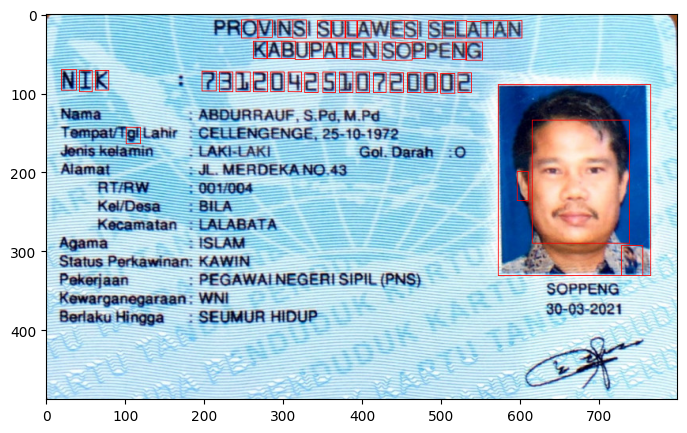

In [9]:
path = cv.imread('/content/drive/MyDrive/PCVK/P1/KTP.jpeg')
blurred = cv.GaussianBlur(path, (5, 5), 0.5)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv.rectangle(path, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 20 and w >= 10 and float(ras) <= 1:
      cv.rectangle(path, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(10,5))
plt.imshow(cv.cvtColor(path, cv.COLOR_BGR2RGB))